<a href="https://colab.research.google.com/github/Ujjwal2017099/Human-Emotion-Detection/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
train_path = "/content/dataset/Emotions Dataset/Emotions Dataset/train"
val_path = "/content/dataset/Emotions Dataset/Emotions Dataset/test"
class_names = ["angry","happy","sad"]
CONFIGURATION = {
    "BATCH_SIZE" : 32,
    "IM_SIZE" : 224,
}

In [8]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='categorical',
    class_names=class_names,
    color_mode='rgb',
    batch_size=CONFIGURATION['BATCH_SIZE'],
    image_size=(CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE']),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6799 files belonging to 3 classes.


In [9]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    labels='inferred',
    label_mode='categorical',
    class_names=class_names,
    color_mode='rgb',
    batch_size=CONFIGURATION['BATCH_SIZE'],
    image_size=(CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE']),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2278 files belonging to 3 classes.


In [14]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [19]:
for i in train_dataset.take(1):
  print(i)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[227.      , 227.      , 227.      ],
         [227.02734 , 227.02734 , 227.02734 ],
         [227.3789  , 227.3789  , 227.3789  ],
         ...,
         [118.578125, 118.578125, 118.578125],
         [111.546875, 111.546875, 111.546875],
         [111.      , 111.      , 111.      ]],

        [[226.3164  , 226.3164  , 226.3164  ],
         [226.34001 , 226.34001 , 226.34001 ],
         [226.64351 , 226.64351 , 226.64351 ],
         ...,
         [118.34036 , 118.34036 , 118.34036 ],
         [111.17453 , 111.17453 , 111.17453 ],
         [110.61719 , 110.61719 , 110.61719 ]],

        [[217.52734 , 217.52734 , 217.52734 ],
         [217.50288 , 217.50288 , 217.50288 ],
         [217.1884  , 217.1884  , 217.1884  ],
         ...,
         [115.28342 , 115.28342 , 115.28342 ],
         [106.38724 , 106.38724 , 106.38724 ],
         [105.69531 , 105.69531 , 105.69531 ]],

        ...,

        [[ 37.726562,  37.726562

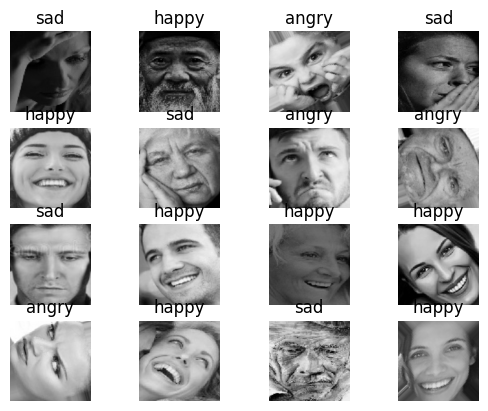

In [24]:
plt.figure.figsize = (12,12)

for image,label in train_dataset.take(1):
  for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(image[i]/255)
    plt.title(class_names[tf.argmax(label[i],axis=0)])
    plt.axis("off")

In [19]:
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling="avg",
    classes=3,
    classifier_activation='softmax'
)

In [27]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True,name='Categorical_Loss'),
              metrics=['accuracy'],run_eagerly=True)

In [21]:
history = model.fit(train_dataset,epochs=30,validation_data=val_dataset,verbose=True)

Epoch 1/30
213/213 [==============================] - 125s 489ms/step - loss: 1.2149 - accuracy: 0.4687 - val_loss: 1.0686 - val_accuracy: 0.4337
Epoch 2/30
213/213 [==============================] - 101s 473ms/step - loss: 1.0437 - accuracy: 0.5130 - val_loss: 2.3968 - val_accuracy: 0.3635
Epoch 3/30
213/213 [==============================] - 101s 471ms/step - loss: 0.9451 - accuracy: 0.5623 - val_loss: 164.7234 - val_accuracy: 0.3213
Epoch 4/30
213/213 [==============================] - 101s 473ms/step - loss: 0.8676 - accuracy: 0.6152 - val_loss: 21.5212 - val_accuracy: 0.4267
Epoch 5/30
213/213 [==============================] - 101s 472ms/step - loss: 0.7726 - accuracy: 0.6605 - val_loss: 1.2578 - val_accuracy: 0.4917
Epoch 6/30
213/213 [==============================] - 101s 472ms/step - loss: 0.6934 - accuracy: 0.7051 - val_loss: 1.0704 - val_accuracy: 0.4732
Epoch 7/30
213/213 [==============================] - 100s 470ms/step - loss: 0.6359 - accuracy: 0.7322 - val_loss: 0.895

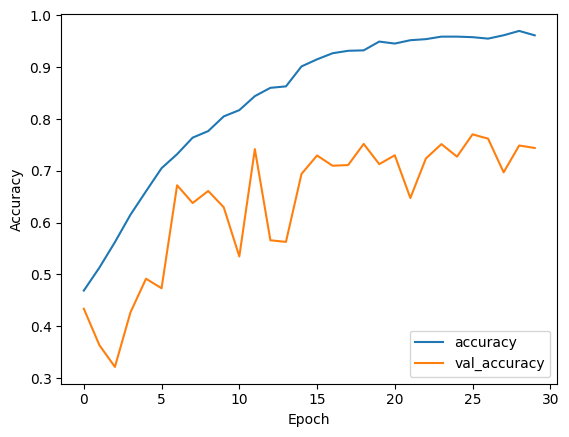

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


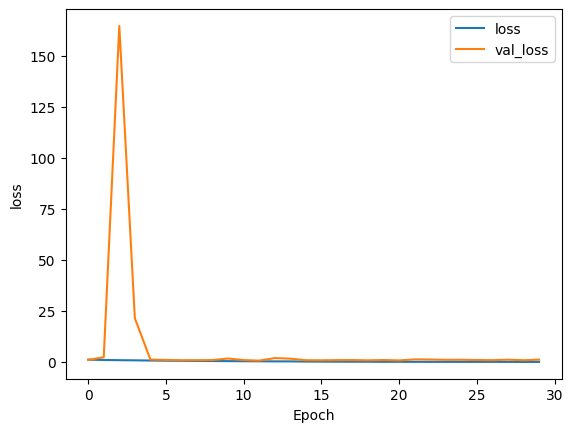

In [25]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')